In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [2]:
workpath = os.getcwd()
dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.5/'
# dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.4/'

In [3]:
# get the name of all opsim dbs 
import glob

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
# workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [4]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [6]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df


In [9]:
%%time
# calculate the FoM of depth
# 1 - (peak - mag_stretch)
sqlstr = 'proposalId=1'

mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
bins = np.arange(18, 27, 0.01)

dicFoM = {}

filters = ['u', 'g', 'r', 'i', 'z', 'y']
for i, dbname in enumerate( dblist_all):
    df_db = get_cols(dbfile=dbpath+dbname,
                   cols='filter, fiveSigmaDepth, night', lim=sqlstr)
    dicFoM[dbname] = {}
    for f in filters:
        m5 = df_db[df_db['filter']==f]['fiveSigmaDepth'].values
        # method to calculate figure of merit of depth from fiveSigmaDepth
        #values, bins, = np.histogram(m5, bins=bins) 
        #mode = bins[ np.argmax(values) ]
        # mode = np.median(m5)
        #FoM = 1 - (mode - mag_stretch[f])
        
        FoM = np.mean(m5)
        
        dicFoM[dbname][f] = FoM
        print(dbname, f, FoM)


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
agnddf_v1.5_10yrs.db u 23.56596863967163
agnddf_v1.5_10yrs.db g 24.520841365632105
agnddf_v1.5_10yrs.db r 24.024872969158565
agnddf_v1.5_10yrs.db i 23.412916874073535
agnddf_v1.5_10yrs.db z 22.769312934363057
agnddf_v1.5_10yrs.db y 21.99247459213662
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
alt_dust_v1.5_10yrs.db u 23.522699307659742
alt_dust_v1.5_10yrs.db g 24.477674651714896
alt_dust_v1.5_10yrs.db r 23.97168741939392
alt_dust_v1.5_10yrs.db i 23.357232260396692
alt_dust_v1.5_10yrs.db z 22.713091533045546
alt_dust_v1.5_10yrs.db y 21.93927294068788
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1


In [10]:
df = pd.DataFrame( dicFoM ).T
df = df.reset_index()
df = df.rename(columns = {'index':'db'})
#df.to_csv('df_depthFoM.csv')
#df

In [13]:
df.head()

,db,g,i,r,u,y,z
0,agnddf_v1.5_10yrs.db,24.520841,23.412917,24.024873,23.565969,21.992475,22.769313
1,alt_dust_v1.5_10yrs.db,24.477675,23.357232,23.971687,23.522699,21.939273,22.713092
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,24.459075,23.291644,23.905499,23.515063,21.895493,22.664684
3,baseline_2snaps_v1.5_10yrs.db,24.448970,23.386586,23.984788,23.377364,21.983992,22.760203
4,baseline_v1.5_10yrs.db,24.515811,23.399556,24.016739,23.574092,21.995174,22.768452


In [14]:
def scale(arr):
    """scale array to 1"""
    # newarr = arr / arr.max()
    newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]


In [15]:
# scale fom table to 0 and 1
df_fom = df
df_new = df_fom[ ['db'] ].copy()
for col in filters:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col]) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "").replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)


In [16]:
def plot_barh(df_new, colon, byfamily=True, **kwargs):
    """barh plot of FoM"""

    df_ = df_new.copy()
    df_['total'] = np.sum(df_[ colon ], axis=1)
    
    # get the max FOM of each family and sort by this
    df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
    df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)
    
    df_ = df_.set_index('db')
    if byfamily:
        df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
    else:
        # sort by total only
        df_ = df_.sort_values(by='total', ascending=True)
    
    df_[colon] = df_[colon]/len(colon)
    ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), **kwargs)
    
    # get positions of hlines
    if byfamily:
        hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
        hlines = [hlines, hlines]
        ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)
    
    plt.xlabel('normalized score', fontsize=20)
    plt.ylabel('')
    plt.legend(loc='lower right', frameon=True)
    plt.xlim([0,1.01])
  

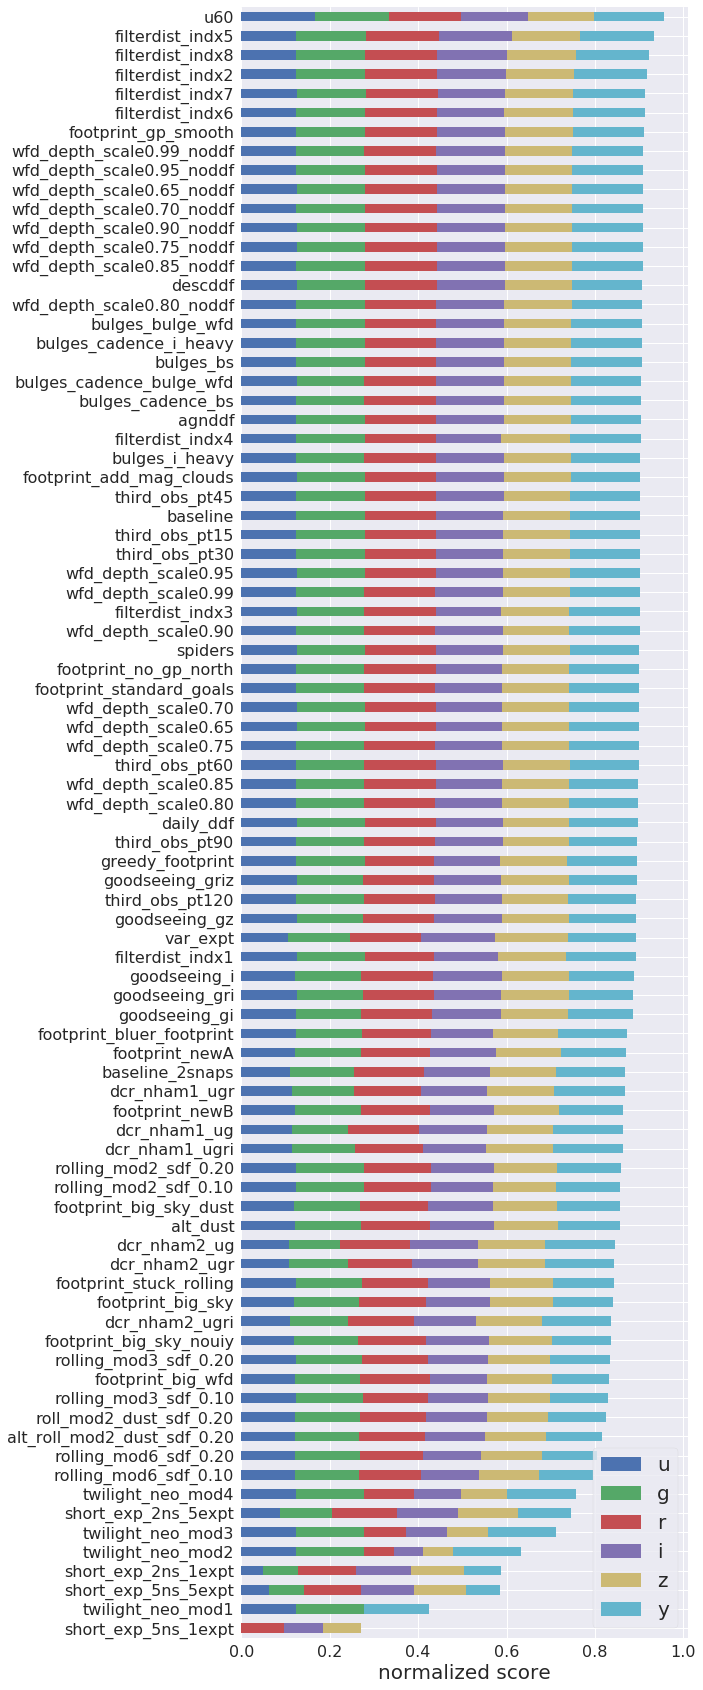

In [17]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

plot_barh(df_new, colon=filters, byfamily=False)

In [18]:
def plot_maghist(df_list, label_list, var='fiveSigmaDepth', ylim=[0, 8000], yticks=[]):
    """plot histogram for each filter"""
    bins = np.arange(18, 27, 0.05)
    fig, axs = plt.subplots(6, 1, figsize=(6, 15), 
                            sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}); 

    axs = axs.flatten()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']

    mag_min = {'u':23.4, 'g':24.6, 'r':24.3, 'i':23.6, 'z':22.9, 'y':21.7 }
    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }

    for i, f in enumerate(FILTERS):
        ax = axs[i]

        #for j, df in enumerate(df_list):
        #    data = df[df['filter']==f][var].values
        #    ax.hist(data, histtype='step', stacked=False, bins=bins, label=label_list[j],); 

        data_stacked = [df[df['filter']==f][var].values for df in df_list]
        ax.hist(data_stacked, histtype='step', stacked=False, linewidth=2,
                bins=bins, label=label_list, ); 

        ax.set_xlabel('fiveSigmaDepth')
        ax.set_ylabel('Nv (k)')
        ax.set_title(f, position=(0.2, 0.7),)
        ax.set_xlim([19, 26])
        ax.set_xticks(np.arange(19, 26, 1))

        ax.set_ylim(ylim)
        ax.set_yticks(yticks)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax.yaxis.get_offset_text().set_visible(False)
        
        # fill mag from science require document
        y = np.linspace(0, ax.get_ylim()[1])
        ax.fill_betweenx(y, mag_min[f], mag_stretch[f], color='gray', alpha=0.2)


    # add shared legend for all subplots 
    lines = []
    labels = []

    for ax in fig.axes[:1]:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)


    fig.legend(lines, labels,           
               loc = 'upper right')

    fig.tight_layout()
    

In [22]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [23]:
df_base = get_cols(dbfile=dbpath+dblist_all[4], 
                   cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_short = get_cols(dbfile=dbpath+'short_exp_2ns_1expt_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')

connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1


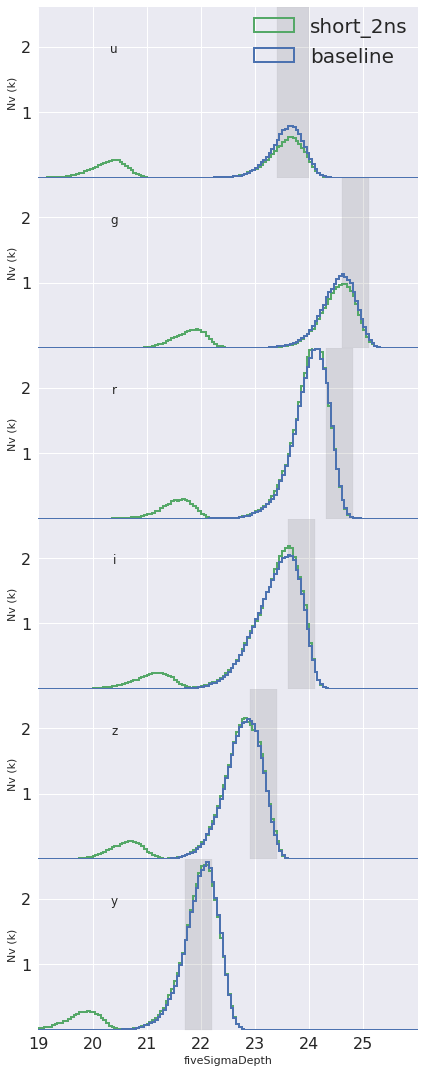

In [24]:
df_list = [df_base,  df_short]
label_list = ['baseline', 'short_2ns']
plot_maghist(df_list, label_list, ylim=[0, 26000], yticks=[10000, 20000])
